In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import re


In [2]:
# path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-ica-pyprep\10s")
path = Path(r"C:\Users\asus\PycharmProjects\eeg_project_gnaut_power_band_analysis\PowerClassification\data\feature-selection-multitaper-drop-pyprep\02s")

trials = []

filter_data = True
sess_to_use = ['1','2','3','4']
# users_to_use = ['UI01','UI02','UI03','UI04','UI05','UI06','UI07','UI08']
users_to_use = ['UI01']
 
            
for file in path.rglob("*.txt"):
    data = pd.read_csv(file, index_col=0)
    
    uid = re.findall('.+(?=_S[0-9]_T[0-9]_)', file.name)[0]
    session = re.findall('(?<=_S)[0-9](?=_T[0-9]_)', file.name)[0]
    trial = re.findall('(?<=_S[0-9]_T)[0-9](?=_)', file.name)[0]
    
    data.loc[:,'session'] = session
    data.loc[:,'user_id'] = uid
    
    if filter_data:
        if session in sess_to_use and uid in users_to_use:
            print(file.name, uid, session, trial)
            trials.append(data)
    else:
        trials.append(data)

data = pd.concat(trials) 
meta_data = data.copy(deep=True).iloc[:,-2:]
data = data.iloc[:,:-2]

orig_data = data.copy(deep=True)
print(data.shape)
data.head()



UI01_S1_T1_pow.txt UI01 1 1
UI01_S1_T2_pow.txt UI01 1 2
UI01_S1_T3_pow.txt UI01 1 3
UI01_S1_T4_pow.txt UI01 1 4
UI01_S1_T5_pow.txt UI01 1 5
UI01_S1_T6_pow.txt UI01 1 6
UI01_S2_T1_pow.txt UI01 2 1
UI01_S2_T2_pow.txt UI01 2 2
UI01_S2_T3_pow.txt UI01 2 3
UI01_S2_T4_pow.txt UI01 2 4
UI01_S2_T5_pow.txt UI01 2 5
UI01_S2_T6_pow.txt UI01 2 6
UI01_S3_T1_pow.txt UI01 3 1
UI01_S3_T2_pow.txt UI01 3 2
UI01_S3_T3_pow.txt UI01 3 3
UI01_S3_T4_pow.txt UI01 3 4
UI01_S3_T5_pow.txt UI01 3 5
UI01_S3_T6_pow.txt UI01 3 6
UI01_S4_T1_pow.txt UI01 4 1
UI01_S4_T2_pow.txt UI01 4 2
UI01_S4_T3_pow.txt UI01 4 3
UI01_S4_T4_pow.txt UI01 4 4
UI01_S4_T5_pow.txt UI01 4 5
UI01_S4_T6_pow.txt UI01 4 6
(1976, 91)


,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Theta,AF3-Alpha,AF3-Beta,AF4-Theta,...,PO3-Theta,PO3-Alpha,PO3-Beta,PO4-Theta,PO4-Alpha,PO4-Beta,OZ-Theta,OZ-Alpha,OZ-Beta,Label
T1_0,0.053340,0.029078,0.033239,0.060214,0.025765,0.024865,0.181636,0.102417,0.145369,0.190065,...,0.207803,0.062034,0.095151,0.181850,0.059609,0.116197,0.201468,0.102627,0.109148,0.0
T1_1,0.040003,0.014103,0.034027,0.054547,0.013272,0.029562,0.178722,0.068660,0.145180,0.102994,...,0.105906,0.064702,0.075739,0.143192,0.043437,0.121179,0.113393,0.030486,0.076540,0.0
T1_2,0.164322,0.053311,0.093731,0.025929,0.010830,0.022120,0.174218,0.048802,0.083635,0.106358,...,0.132577,0.063766,0.099761,0.138908,0.118746,0.175308,0.106186,0.090833,0.285597,0.0
T1_3,0.061146,0.014643,0.028132,0.036100,0.015874,0.017527,0.083620,0.032316,0.040867,0.085049,...,0.173154,0.116659,0.056338,0.204245,0.056954,0.044413,0.144914,0.062381,0.049023,0.0
T1_4,0.046892,0.011089,0.031605,0.023279,0.007934,0.020628,0.339310,0.037846,0.103944,0.204916,...,0.212626,0.127604,0.146310,0.151470,0.089861,0.154866,0.178238,0.093071,0.158044,0.0


In [3]:
meta_data.head()

,session,user_id
T1_0,1,UI01
T1_1,1,UI01
T1_2,1,UI01
T1_3,1,UI01
T1_4,1,UI01


In [4]:
corr = data.corr()
# corr.iloc[-1,:20].max()

print("data shape", data.shape)
print("corr shape", corr.shape)
corr


data shape (1976, 91)
corr shape (91, 91)


,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Theta,AF3-Alpha,AF3-Beta,AF4-Theta,...,PO3-Theta,PO3-Alpha,PO3-Beta,PO4-Theta,PO4-Alpha,PO4-Beta,OZ-Theta,OZ-Alpha,OZ-Beta,Label
FP1-Theta,1.000000,0.624256,0.508080,0.555975,0.344379,0.230563,0.517608,0.178675,0.176268,0.384959,...,0.236662,0.095752,0.122818,0.319473,0.135801,0.140826,0.253126,0.089468,0.067923,0.074362
FP1-Alpha,0.624256,1.000000,0.630148,0.380066,0.582041,0.326558,0.257589,0.489398,0.328761,0.225182,...,0.094808,0.294578,0.211218,0.155427,0.317481,0.238518,0.148543,0.226920,0.120425,0.131209
FP1-Beta,0.508080,0.630148,1.000000,0.283115,0.392559,0.675385,0.175811,0.245932,0.534208,0.141533,...,0.068769,0.179504,0.270836,0.093602,0.163346,0.309787,0.113443,0.130993,0.155131,0.132829
FP2-Theta,0.555975,0.380066,0.283115,1.000000,0.622003,0.370124,0.292000,0.153924,0.120492,0.578104,...,0.292398,0.164898,0.181688,0.236842,0.121425,0.108350,0.272209,0.126473,0.084533,0.131009
FP2-Alpha,0.344379,0.582041,0.392559,0.622003,1.000000,0.507188,0.176928,0.307217,0.229877,0.332162,...,0.117960,0.366612,0.274382,0.109615,0.276776,0.215843,0.167275,0.234825,0.132292,0.160308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PO4-Beta,0.140826,0.238518,0.309787,0.108350,0.215843,0.216230,0.161338,0.332026,0.521251,0.091539,...,-0.035155,0.264869,0.457807,0.094570,0.489996,1.000000,0.029845,0.299568,0.369199,0.021910
OZ-Theta,0.253126,0.148543,0.113443,0.272209,0.167275,0.088476,0.476063,0.150545,0.095177,0.510963,...,0.600699,0.144790,-0.000665,0.503949,0.152760,0.029845,1.000000,0.199514,-0.057163,0.043451
OZ-Alpha,0.089468,0.226920,0.130993,0.126473,0.234825,0.115001,0.191884,0.461201,0.307026,0.167916,...,0.064927,0.528329,0.289372,0.137115,0.425074,0.299568,0.199514,1.000000,0.482874,0.054637
OZ-Beta,0.067923,0.120425,0.155131,0.084533,0.132292,0.134207,0.147194,0.230232,0.360005,0.110862,...,-0.014738,0.219455,0.475919,0.057855,0.153424,0.369199,-0.057163,0.482874,1.000000,0.080245


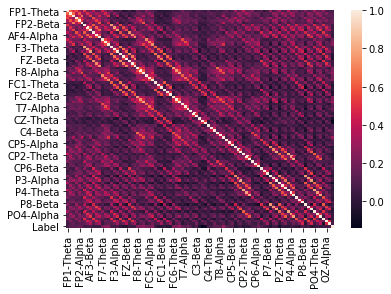

In [5]:
sns.heatmap(corr)

In [6]:
#Select features that have a correlation of more that 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.85:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]
selected_columns.shape

(91,)

In [7]:
data = data[selected_columns]
data

,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Theta,AF3-Alpha,AF3-Beta,AF4-Theta,...,PO3-Theta,PO3-Alpha,PO3-Beta,PO4-Theta,PO4-Alpha,PO4-Beta,OZ-Theta,OZ-Alpha,OZ-Beta,Label
T1_0,0.053340,0.029078,0.033239,0.060214,0.025765,0.024865,0.181636,0.102417,0.145369,0.190065,...,0.207803,0.062034,0.095151,0.181850,0.059609,0.116197,0.201468,0.102627,0.109148,0.0
T1_1,0.040003,0.014103,0.034027,0.054547,0.013272,0.029562,0.178722,0.068660,0.145180,0.102994,...,0.105906,0.064702,0.075739,0.143192,0.043437,0.121179,0.113393,0.030486,0.076540,0.0
T1_2,0.164322,0.053311,0.093731,0.025929,0.010830,0.022120,0.174218,0.048802,0.083635,0.106358,...,0.132577,0.063766,0.099761,0.138908,0.118746,0.175308,0.106186,0.090833,0.285597,0.0
T1_3,0.061146,0.014643,0.028132,0.036100,0.015874,0.017527,0.083620,0.032316,0.040867,0.085049,...,0.173154,0.116659,0.056338,0.204245,0.056954,0.044413,0.144914,0.062381,0.049023,0.0
T1_4,0.046892,0.011089,0.031605,0.023279,0.007934,0.020628,0.339310,0.037846,0.103944,0.204916,...,0.212626,0.127604,0.146310,0.151470,0.089861,0.154866,0.178238,0.093071,0.158044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T6_81,0.132753,0.041331,0.090515,0.110107,0.041437,0.088330,0.156271,0.079323,0.125674,0.127138,...,0.195437,0.097973,0.187275,0.165913,0.068890,0.243531,0.111837,0.109350,0.185608,1.0
T6_82,0.071889,0.033842,0.028512,0.094232,0.044029,0.047829,0.095757,0.057686,0.055747,0.099932,...,0.153081,0.051671,0.139272,0.132971,0.132836,0.071788,0.213364,0.154339,0.285399,1.0
T6_83,0.089049,0.082472,0.074168,0.185901,0.094330,0.122954,0.160004,0.107129,0.132397,0.186517,...,0.152945,0.120127,0.220775,0.204713,0.135327,0.165703,0.170670,0.068647,0.295972,1.0
T6_84,0.082934,0.022024,0.042340,0.047308,0.018240,0.038970,0.113180,0.033987,0.056943,0.083407,...,0.070895,0.030811,0.096188,0.125741,0.038121,0.081167,0.063249,0.055144,0.226457,1.0


In [8]:
selected_columns2 = selected_columns[:-1].values  # Removing the label column
print(selected_columns.shape)
selected_columns2


(91,)


array(['FP1-Theta', 'FP1-Alpha', 'FP1-Beta', 'FP2-Theta', 'FP2-Alpha',
       'FP2-Beta', 'AF3-Theta', 'AF3-Alpha', 'AF3-Beta', 'AF4-Theta',
       'AF4-Alpha', 'AF4-Beta', 'F7-Theta', 'F7-Alpha', 'F7-Beta',
       'F3-Theta', 'F3-Alpha', 'F3-Beta', 'FZ-Theta', 'FZ-Alpha',
       'FZ-Beta', 'F4-Theta', 'F4-Alpha', 'F4-Beta', 'F8-Theta',
       'F8-Alpha', 'F8-Beta', 'FC5-Theta', 'FC5-Alpha', 'FC5-Beta',
       'FC1-Theta', 'FC1-Alpha', 'FC1-Beta', 'FC2-Theta', 'FC2-Alpha',
       'FC2-Beta', 'FC6-Theta', 'FC6-Alpha', 'FC6-Beta', 'T7-Theta',
       'T7-Alpha', 'T7-Beta', 'C3-Theta', 'C3-Alpha', 'C3-Beta',
       'CZ-Theta', 'CZ-Alpha', 'CZ-Beta', 'C4-Theta', 'C4-Alpha',
       'C4-Beta', 'T8-Theta', 'T8-Alpha', 'T8-Beta', 'CP5-Theta',
       'CP5-Alpha', 'CP5-Beta', 'CP1-Theta', 'CP1-Alpha', 'CP1-Beta',
       'CP2-Theta', 'CP2-Alpha', 'CP2-Beta', 'CP6-Theta', 'CP6-Alpha',
       'CP6-Beta', 'P7-Theta', 'P7-Alpha', 'P7-Beta', 'P3-Theta',
       'P3-Alpha', 'P3-Beta', 'PZ-Theta', 'PZ-Alp

In [9]:
data = data.dropna()


In [10]:
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
#                     print(columns)
                    
    regressor_OLS.summary()
    return x, columns


In [11]:
SL = 0.05
data_modeled, selected_columns3 = backwardElimination(data.iloc[:,:-1].values, data.iloc[:,-1].values, SL, selected_columns2)

data

,FP1-Theta,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Alpha,FP2-Beta,AF3-Theta,AF3-Alpha,AF3-Beta,AF4-Theta,...,PO3-Theta,PO3-Alpha,PO3-Beta,PO4-Theta,PO4-Alpha,PO4-Beta,OZ-Theta,OZ-Alpha,OZ-Beta,Label
T1_0,0.053340,0.029078,0.033239,0.060214,0.025765,0.024865,0.181636,0.102417,0.145369,0.190065,...,0.207803,0.062034,0.095151,0.181850,0.059609,0.116197,0.201468,0.102627,0.109148,0.0
T1_1,0.040003,0.014103,0.034027,0.054547,0.013272,0.029562,0.178722,0.068660,0.145180,0.102994,...,0.105906,0.064702,0.075739,0.143192,0.043437,0.121179,0.113393,0.030486,0.076540,0.0
T1_2,0.164322,0.053311,0.093731,0.025929,0.010830,0.022120,0.174218,0.048802,0.083635,0.106358,...,0.132577,0.063766,0.099761,0.138908,0.118746,0.175308,0.106186,0.090833,0.285597,0.0
T1_3,0.061146,0.014643,0.028132,0.036100,0.015874,0.017527,0.083620,0.032316,0.040867,0.085049,...,0.173154,0.116659,0.056338,0.204245,0.056954,0.044413,0.144914,0.062381,0.049023,0.0
T1_4,0.046892,0.011089,0.031605,0.023279,0.007934,0.020628,0.339310,0.037846,0.103944,0.204916,...,0.212626,0.127604,0.146310,0.151470,0.089861,0.154866,0.178238,0.093071,0.158044,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T6_81,0.132753,0.041331,0.090515,0.110107,0.041437,0.088330,0.156271,0.079323,0.125674,0.127138,...,0.195437,0.097973,0.187275,0.165913,0.068890,0.243531,0.111837,0.109350,0.185608,1.0
T6_82,0.071889,0.033842,0.028512,0.094232,0.044029,0.047829,0.095757,0.057686,0.055747,0.099932,...,0.153081,0.051671,0.139272,0.132971,0.132836,0.071788,0.213364,0.154339,0.285399,1.0
T6_83,0.089049,0.082472,0.074168,0.185901,0.094330,0.122954,0.160004,0.107129,0.132397,0.186517,...,0.152945,0.120127,0.220775,0.204713,0.135327,0.165703,0.170670,0.068647,0.295972,1.0
T6_84,0.082934,0.022024,0.042340,0.047308,0.018240,0.038970,0.113180,0.033987,0.056943,0.083407,...,0.070895,0.030811,0.096188,0.125741,0.038121,0.081167,0.063249,0.055144,0.226457,1.0


In [12]:
print(selected_columns3.shape)
print(selected_columns3)

(32,)
['FP1-Alpha' 'FP1-Beta' 'FP2-Theta' 'FP2-Beta' 'AF3-Alpha' 'AF3-Beta'
 'AF4-Beta' 'F7-Alpha' 'F7-Beta' 'F8-Alpha' 'FC5-Theta' 'FC2-Theta'
 'FC6-Theta' 'FC6-Beta' 'T7-Alpha' 'CZ-Alpha' 'CZ-Beta' 'C4-Theta'
 'C4-Beta' 'T8-Alpha' 'T8-Beta' 'P7-Theta' 'P3-Beta' 'PZ-Theta' 'PZ-Alpha'
 'P4-Theta' 'P8-Theta' 'P8-Beta' 'PO3-Theta' 'PO3-Beta' 'PO4-Beta'
 'OZ-Beta']


In [13]:
data_reduced_feat = pd.DataFrame(data = data_modeled, columns = selected_columns3)
data_reduced_feat['workload'] = 'Low'
data_reduced_feat.loc[data.iloc[:,-1].values == 1.0,'workload'] = 'High'


In [14]:
print(data_reduced_feat.loc[data_reduced_feat['workload']=='Low'].shape)
print(data_reduced_feat.loc[data_reduced_feat['workload']=='High'].shape)
data_reduced_feat.loc[data_reduced_feat['workload']=='Low'].head()

(821, 33)
(1155, 33)


,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Beta,AF3-Alpha,AF3-Beta,AF4-Beta,F7-Alpha,F7-Beta,F8-Alpha,...,PZ-Theta,PZ-Alpha,P4-Theta,P8-Theta,P8-Beta,PO3-Theta,PO3-Beta,PO4-Beta,OZ-Beta,workload
0,0.029078,0.033239,0.060214,0.024865,0.102417,0.145369,0.111534,0.039050,0.073848,0.023310,...,0.103739,0.049829,0.112775,0.189598,0.173986,0.207803,0.095151,0.116197,0.109148,Low
1,0.014103,0.034027,0.054547,0.029562,0.068660,0.145180,0.057580,0.032070,0.057039,0.046085,...,0.082404,0.051848,0.122904,0.153298,0.145616,0.105906,0.075739,0.121179,0.076540,Low
2,0.053311,0.093731,0.025929,0.022120,0.048802,0.083635,0.061542,0.064855,0.127465,0.022586,...,0.117266,0.043674,0.131461,0.154615,0.180532,0.132577,0.099761,0.175308,0.285597,Low
3,0.014643,0.028132,0.036100,0.017527,0.032316,0.040867,0.042652,0.037302,0.063325,0.063882,...,0.153447,0.067321,0.157040,0.144215,0.090148,0.173154,0.056338,0.044413,0.049023,Low
4,0.011089,0.031605,0.023279,0.020628,0.037846,0.103944,0.120630,0.046394,0.085328,0.044011,...,0.151110,0.050179,0.162143,0.141103,0.271229,0.212626,0.146310,0.154866,0.158044,Low


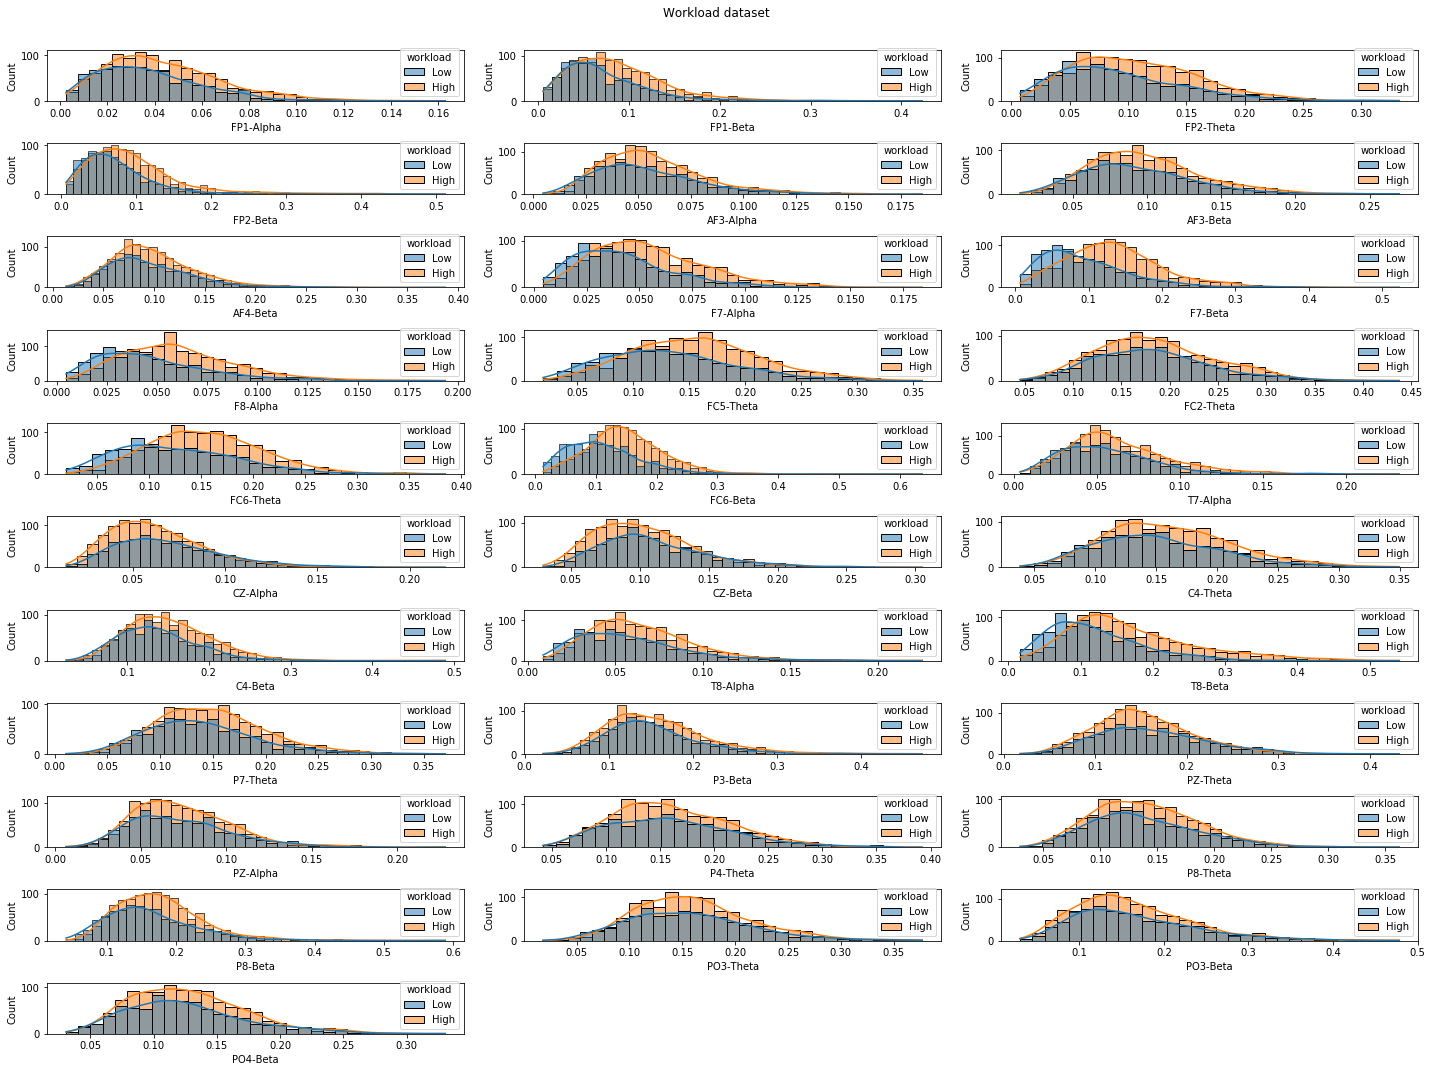

In [15]:
fig = plt.figure(figsize = (20, 20))

j = 0
for i in data_reduced_feat.columns[:-2]:
    plt.subplot(15, 3, j+1)
    j += 1
    sns.histplot(data=data_reduced_feat, x=i, kde=True, hue="workload", legend=True)
    
    if j>44:
        break

fig.suptitle('Workload dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Could not interpret value `FC5-Beta` for parameter `x`


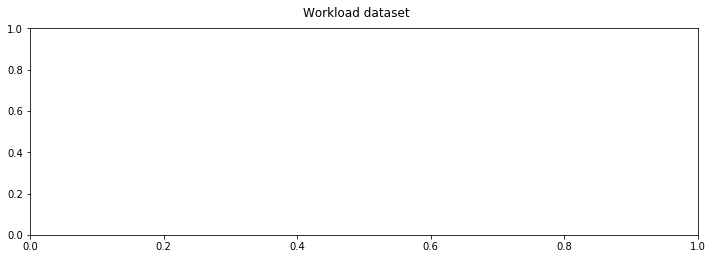

In [16]:
fig = plt.figure(figsize = (10,10))

j = 0
try:
    for col in ['FC5-Beta' ,'F7-Beta', 'T7-Beta' ]:
        plt.subplot(3, 1, j+1)
        j += 1
        sns.histplot(data=data_reduced_feat, x=col, kde=True, hue="workload", legend=True)
except Exception as e:
    print(e)
    
fig.suptitle('Workload dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Statistical tests

In [17]:
print(data_reduced_feat.shape)
data_reduced_feat.head()

(1976, 33)


,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Beta,AF3-Alpha,AF3-Beta,AF4-Beta,F7-Alpha,F7-Beta,F8-Alpha,...,PZ-Theta,PZ-Alpha,P4-Theta,P8-Theta,P8-Beta,PO3-Theta,PO3-Beta,PO4-Beta,OZ-Beta,workload
0,0.029078,0.033239,0.060214,0.024865,0.102417,0.145369,0.111534,0.039050,0.073848,0.023310,...,0.103739,0.049829,0.112775,0.189598,0.173986,0.207803,0.095151,0.116197,0.109148,Low
1,0.014103,0.034027,0.054547,0.029562,0.068660,0.145180,0.057580,0.032070,0.057039,0.046085,...,0.082404,0.051848,0.122904,0.153298,0.145616,0.105906,0.075739,0.121179,0.076540,Low
2,0.053311,0.093731,0.025929,0.022120,0.048802,0.083635,0.061542,0.064855,0.127465,0.022586,...,0.117266,0.043674,0.131461,0.154615,0.180532,0.132577,0.099761,0.175308,0.285597,Low
3,0.014643,0.028132,0.036100,0.017527,0.032316,0.040867,0.042652,0.037302,0.063325,0.063882,...,0.153447,0.067321,0.157040,0.144215,0.090148,0.173154,0.056338,0.044413,0.049023,Low
4,0.011089,0.031605,0.023279,0.020628,0.037846,0.103944,0.120630,0.046394,0.085328,0.044011,...,0.151110,0.050179,0.162143,0.141103,0.271229,0.212626,0.146310,0.154866,0.158044,Low


In [18]:
print(meta_data.shape)
meta_data = meta_data.set_index(data_reduced_feat.index)
meta_data.head()

(1976, 2)


,session,user_id
0,1,UI01
1,1,UI01
2,1,UI01
3,1,UI01
4,1,UI01


In [19]:
data_reduced_complete = pd.concat([data_reduced_feat, meta_data[['session','user_id']] ], axis=1)
data_reduced_complete.head()

,FP1-Alpha,FP1-Beta,FP2-Theta,FP2-Beta,AF3-Alpha,AF3-Beta,AF4-Beta,F7-Alpha,F7-Beta,F8-Alpha,...,P4-Theta,P8-Theta,P8-Beta,PO3-Theta,PO3-Beta,PO4-Beta,OZ-Beta,workload,session,user_id
0,0.029078,0.033239,0.060214,0.024865,0.102417,0.145369,0.111534,0.039050,0.073848,0.023310,...,0.112775,0.189598,0.173986,0.207803,0.095151,0.116197,0.109148,Low,1,UI01
1,0.014103,0.034027,0.054547,0.029562,0.068660,0.145180,0.057580,0.032070,0.057039,0.046085,...,0.122904,0.153298,0.145616,0.105906,0.075739,0.121179,0.076540,Low,1,UI01
2,0.053311,0.093731,0.025929,0.022120,0.048802,0.083635,0.061542,0.064855,0.127465,0.022586,...,0.131461,0.154615,0.180532,0.132577,0.099761,0.175308,0.285597,Low,1,UI01
3,0.014643,0.028132,0.036100,0.017527,0.032316,0.040867,0.042652,0.037302,0.063325,0.063882,...,0.157040,0.144215,0.090148,0.173154,0.056338,0.044413,0.049023,Low,1,UI01
4,0.011089,0.031605,0.023279,0.020628,0.037846,0.103944,0.120630,0.046394,0.085328,0.044011,...,0.162143,0.141103,0.271229,0.212626,0.146310,0.154866,0.158044,Low,1,UI01


In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import seaborn as sns

In [21]:
data_reduced_complete = data_reduced_complete.rename(columns=lambda x:x.replace('-',''))

# model = ols("P8Beta ~ C(workload) + C(session)", data=data_reduced_complete).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)
# anova_table

In [22]:
results = pd.DataFrame(columns=['workload-pvalue','session-pvalue','userid-pvalue'])
for col in data_reduced_complete.columns[:-3]:

#     anova_model  = "{:} ~ C(workload) + C(session) + C(user_id)".format(col)
    anova_model  = "{:} ~ C(workload) + C(session)".format(col)
    model = ols(anova_model, data=data_reduced_complete).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    results.loc[col,'workload-pvalue'] = anova_table.loc['C(workload)','PR(>F)']
    results.loc[col,'session-pvalue']  = anova_table.loc['C(session)','PR(>F)']
#     results.loc[col,'userid-pvalue']  = anova_table.loc['C(user_id)','PR(>F)']

#     print(anova_model)

In [23]:
anova_table

,sum_sq,df,F,PR(>F)
C(workload),0.105716,1.0,15.571164,8.224172e-05
C(session),0.250953,3.0,12.321197,5.508667e-08
Residual,13.381518,1971.0,NaN,NaN


In [24]:
pd.options.display.float_format = "{:,.4f}".format

#Significant results
results.loc[results['workload-pvalue']<0.05]

,workload-pvalue,session-pvalue,userid-pvalue
FP1Alpha,0.0000,0.0000,NaN
FP1Beta,0.0000,0.0000,NaN
FP2Theta,0.0000,0.0000,NaN
FP2Beta,0.0000,0.0000,NaN
AF3Alpha,0.0054,0.0079,NaN
AF3Beta,0.0017,0.0000,NaN
F7Alpha,0.0000,0.0050,NaN
F7Beta,0.0000,0.0000,NaN
F8Alpha,0.0000,0.0000,NaN
FC5Theta,0.0000,0.0046,NaN


In [25]:
results.loc[results['workload-pvalue']>0.05]

,workload-pvalue,session-pvalue,userid-pvalue
AF4Beta,0.3329,0.0000,NaN
FC2Theta,0.2334,0.0027,NaN
PZAlpha,0.5944,0.0000,NaN
P4Theta,0.7757,0.0000,NaN
P8Theta,0.7189,0.0044,NaN
PO3Theta,0.0817,0.0087,NaN
PO3Beta,0.1554,0.0000,NaN
PO4Beta,0.6282,0.0000,NaN


In [26]:

# ax = sns.boxplot(x='workload', y='FC5Beta', data=data_reduced_complete, color='#99c2a2')



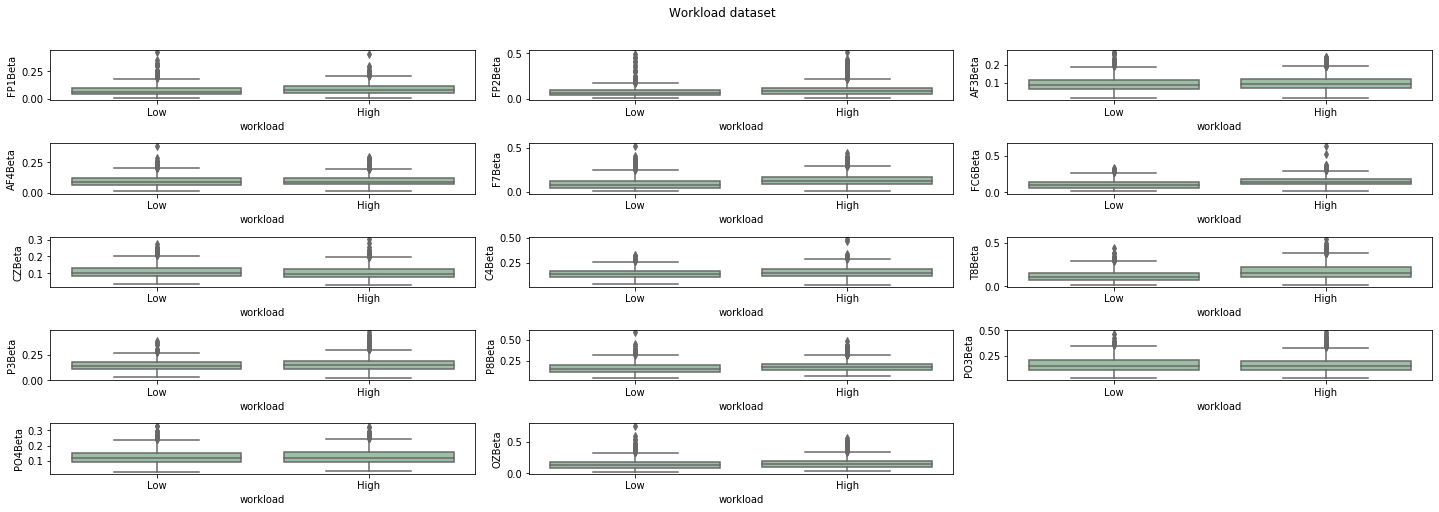

In [27]:
import re

fig = plt.figure(figsize = (20, 20))
j = 0

for col in data_reduced_complete.columns:
    ans = re.findall('Beta',col)
    if len(ans)>0:
        plt.subplot(15, 3, j+1)
        j += 1
        sns.boxplot(x='workload', y=col, data=data_reduced_complete, color='#99c2a2')
        

fig.suptitle('Workload dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [28]:
data_reduced_complete.head()

,FP1Alpha,FP1Beta,FP2Theta,FP2Beta,AF3Alpha,AF3Beta,AF4Beta,F7Alpha,F7Beta,F8Alpha,...,P4Theta,P8Theta,P8Beta,PO3Theta,PO3Beta,PO4Beta,OZBeta,workload,session,user_id
0,0.0291,0.0332,0.0602,0.0249,0.1024,0.1454,0.1115,0.0390,0.0738,0.0233,...,0.1128,0.1896,0.1740,0.2078,0.0952,0.1162,0.1091,Low,1,UI01
1,0.0141,0.0340,0.0545,0.0296,0.0687,0.1452,0.0576,0.0321,0.0570,0.0461,...,0.1229,0.1533,0.1456,0.1059,0.0757,0.1212,0.0765,Low,1,UI01
2,0.0533,0.0937,0.0259,0.0221,0.0488,0.0836,0.0615,0.0649,0.1275,0.0226,...,0.1315,0.1546,0.1805,0.1326,0.0998,0.1753,0.2856,Low,1,UI01
3,0.0146,0.0281,0.0361,0.0175,0.0323,0.0409,0.0427,0.0373,0.0633,0.0639,...,0.1570,0.1442,0.0901,0.1732,0.0563,0.0444,0.0490,Low,1,UI01
4,0.0111,0.0316,0.0233,0.0206,0.0378,0.1039,0.1206,0.0464,0.0853,0.0440,...,0.1621,0.1411,0.2712,0.2126,0.1463,0.1549,0.1580,Low,1,UI01


In [29]:
data_reduced_complete.pivot(columns='workload')

FP1Alpha        FP1Beta        FP2Theta        FP2Beta         \
workload     High    Low    High    Low     High    Low    High    Low   
0             nan 0.0291     nan 0.0332      nan 0.0602     nan 0.0249   
1             nan 0.0141     nan 0.0340      nan 0.0545     nan 0.0296   
2             nan 0.0533     nan 0.0937      nan 0.0259     nan 0.0221   
3             nan 0.0146     nan 0.0281      nan 0.0361     nan 0.0175   
4             nan 0.0111     nan 0.0316      nan 0.0233     nan 0.0206   
...           ...    ...     ...    ...      ...    ...     ...    ...   
1971       0.0413    nan  0.0905    nan   0.1101    nan  0.0883    nan   
1972       0.0338    nan  0.0285    nan   0.0942    nan  0.0478    nan   
1973       0.0825    nan  0.0742    nan   0.1859    nan  0.1230    nan   
1974       0.0220    nan  0.0423    nan   0.0473    nan  0.0390    nan   
1975       0.0553    nan  0.0728    nan   0.0762    nan  0.0836    nan   

         AF3Alpha         ... PO3Beta        PO4Beta        OZBeta         \
workload     High    Low  ...    High    Low    High    Low   High    Low   
0             nan 0.1024  ...     nan 0.0952     nan 0.1162    nan 0.1091   
1             nan 0.0687  ...     nan 0.0757     nan 0.1212    nan 0.0765   
2             nan 0.0488  ...     nan 0.0998     nan 0.1753    nan 0.2856   
3             nan 0.0323  ...     nan 0.0563     nan 0.0444    nan 0.0490   
4             nan 0.0378  ...     nan 0.1463     nan 0.1549    nan 0.1580   
...           ...    ...  ...     ...    ...     ...    ...    ...    ...   
1971       0.0793    nan  ...  0.1873    nan  0.2435    nan 0.1856    nan   
1972       0.0577    nan  ...  0.1393    nan  0.0718    nan 0.2854    nan   
1973       0.1071    nan  ...  0.2208    nan  0.1657    nan 0.2960    nan   
1974       0.0340    nan  ...  0.0962    nan  0.0812    nan 0.2265    nan   
1975       0.0470    nan  ...  0.1616    nan  0.0770    nan 0.2291    nan   

         session      user_id        
workload    High  Low    High   Low  
0            NaN    1     NaN  UI01  
1            NaN    1     NaN  UI01  
2            NaN    1     NaN  UI01  
3            NaN    1     NaN  UI01  
4            NaN    1     NaN  UI01  
...          ...  ...     ...   ...  
1971           4  NaN    UI01   NaN  
1972           4  NaN    UI01   NaN  
1973           4  NaN    UI01   NaN  
1974           4  NaN    UI01   NaN  
1975           4  NaN    UI01   NaN  

[1976 rows x 68 columns]

In [30]:
results.loc[results['workload-pvalue']<0.05]

,workload-pvalue,session-pvalue,userid-pvalue
FP1Alpha,0.0000,0.0000,NaN
FP1Beta,0.0000,0.0000,NaN
FP2Theta,0.0000,0.0000,NaN
FP2Beta,0.0000,0.0000,NaN
AF3Alpha,0.0054,0.0079,NaN
AF3Beta,0.0017,0.0000,NaN
F7Alpha,0.0000,0.0050,NaN
F7Beta,0.0000,0.0000,NaN
F8Alpha,0.0000,0.0000,NaN
FC5Theta,0.0000,0.0046,NaN


In [31]:
significant_feat = results.loc[results['workload-pvalue']<0.05].index

low_data = data_reduced_complete.loc[data_reduced_complete['workload']=='Low'].mean()
high_data = data_reduced_complete.loc[data_reduced_complete['workload']=='High'].mean()

means_frame = pd.DataFrame(columns =['low','high','p-value'])
# print(low_data)
# print(low_data['FP1Alpha'])

for feat in significant_feat:
    means_frame.loc[feat] = [low_data[feat],high_data[feat],1] 

means_frame['difference'] = means_frame['low']-means_frame['high']
means_frame['abs_diff'] = abs(means_frame['difference'])
means_frame =  means_frame.sort_values(by=['abs_diff'], ascending=False)

means_frame

,low,high,p-value,difference,abs_diff
T8Beta,0.1196,0.1708,1.0000,-0.0512,0.0512
FC6Beta,0.1110,0.1492,1.0000,-0.0382,0.0382
F7Beta,0.0975,0.1353,1.0000,-0.0378,0.0378
FC6Theta,0.1267,0.1544,1.0000,-0.0277,0.0277
FC5Theta,0.1321,0.1567,1.0000,-0.0245,0.0245
FP2Beta,0.0747,0.0963,1.0000,-0.0215,0.0215
C4Beta,0.1372,0.1521,1.0000,-0.0149,0.0149
FP2Theta,0.0933,0.1075,1.0000,-0.0142,0.0142
F8Alpha,0.0474,0.0613,1.0000,-0.0139,0.0139
OZBeta,0.1512,0.1647,1.0000,-0.0136,0.0136


# Topoplots

In [32]:
orig_data.shape
orig_data.head()
# significant_feat
orig_data.mean(axis=0)

orig_data['workload'] = 'Low'
orig_data.loc[data.iloc[:,-1].values == 1.0,'workload'] = 'High'


#Split into theta, alpha, beta
theta_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}
alpha_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}
beta_frame = {'Low': pd.DataFrame(columns=['relative_mean']),
               'High':pd.DataFrame(columns=['relative_mean'])}

for w in ['High','Low']:
    mean_data = orig_data.loc[orig_data['workload'] == w].mean(axis=0)
    
    for idx in mean_data.index[:-1]:
        ch, bd = idx.split('-')
        if bd == "Theta":
            theta_frame[w].loc[ch] = mean_data[idx]
        elif bd == "Alpha":
            alpha_frame[w].loc[ch] = mean_data[idx]
        elif bd == "Beta":
            beta_frame[w].loc[ch] = mean_data[idx]



In [33]:
def clean_axes(a):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["left"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.set_xticks([])
    a.set_xticks([],minor=True)
    a.set_yticks([])
    a.set_yticks([],minor=True)
            
def create_topoplots(data_frame,fig_title):
    from mne.viz import plot_topomap

    locations = pd.read_csv('./channel_2d_location.csv', index_col=0)
    locations = locations.drop(index=["PO8","PO7"])

    
    fig, ax = plt.subplots(1,3, figsize= (20,8),gridspec_kw={'width_ratios': [5,5,1]})
    fig.suptitle(fig_title, fontsize=20)

    mask_params = dict(marker='o', markerfacecolor='w', markeredgecolor='k',
         linewidth=0, markersize=8)
    

    ax_title = "High"
    ax[0].set_title(ax_title)
    im, cn = plot_topomap(data_frame[ax_title]['relative_mean'].values, locations[['x','y']].values,
                          outlines='head', axes=ax[0],cmap='RdBu_r',show=False,
                          names = theta_frame[ax_title].index, show_names=True,)

    ax_title = "Low"
    ax[1].set_title(ax_title)
    im, cn = plot_topomap(data_frame[ax_title]['relative_mean'].values, locations[['x','y']].values,
                          outlines='head', axes=ax[1],cmap='RdBu_r',show=False,
                          names = theta_frame[ax_title].index, show_names=True)

    fig.colorbar(im, ax=ax[2])
    clean_axes(ax[2])
    plt.show()

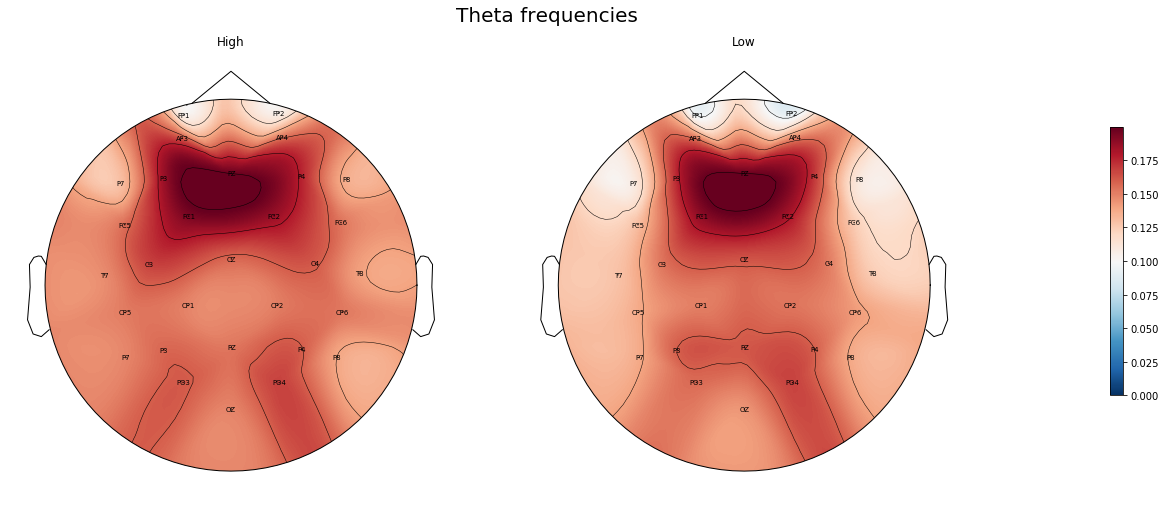

In [34]:
create_topoplots(theta_frame,"Theta frequencies")


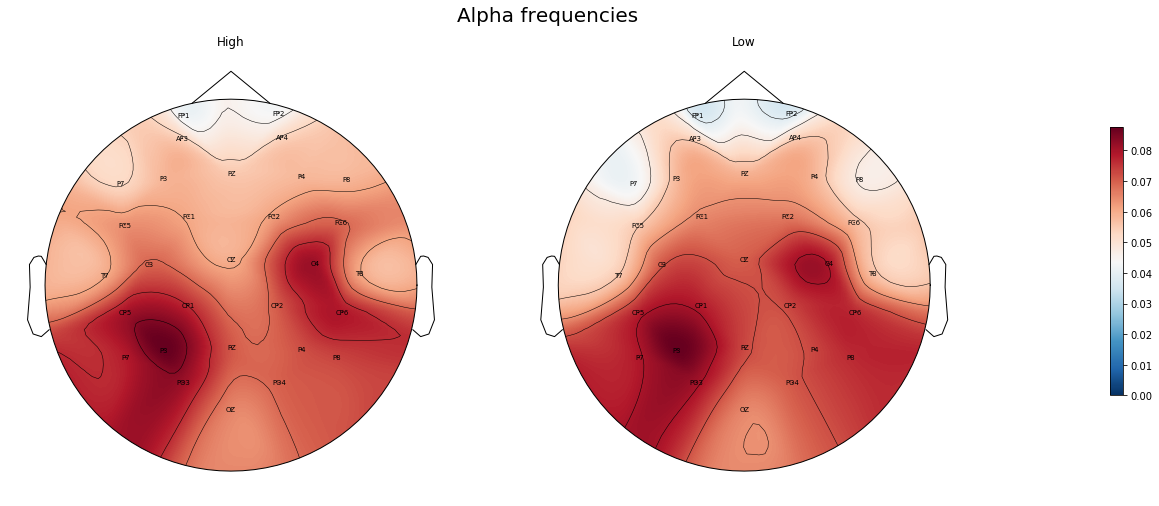

In [35]:
create_topoplots(alpha_frame,"Alpha frequencies")

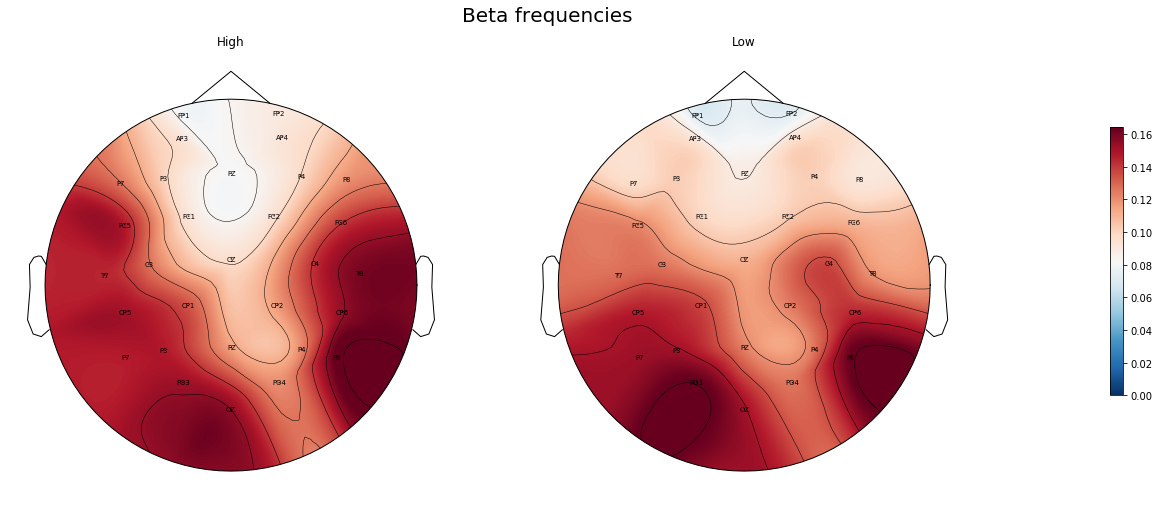

In [36]:
create_topoplots(beta_frame,"Beta frequencies")

1) remove feature removal 
2) plot channels means that are significantly different.